In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#sklearn - scikit learn

In [3]:
data = pd.read_csv('headbrain.csv')

In [4]:
data.shape

(237, 4)

In [5]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
X = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

In [7]:
mean_x = np.mean(X)
mean_y = np.mean(y)

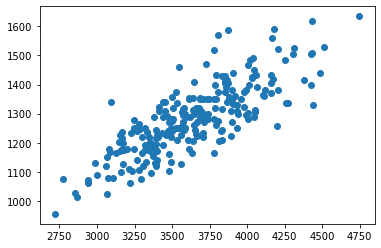

In [8]:
plt.scatter(X, y)
plt.show()

In [9]:
numer = 0
denom = 0

n = len(X)

for i in range(n):
    numer += (X[i] - mean_x) * (y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    
slope = numer / denom
inter = mean_y - slope * mean_x


In [10]:
slope, inter

(0.26342933948939945, 325.57342104944223)

In [11]:
predictions = []

for i in range(n):
    pred = slope * X[i] + inter
    predictions.append(int(pred))

In [12]:
predictions[:10]

[1514, 1310, 1448, 1320, 1425, 1269, 1322, 1263, 1277, 1374]

In [13]:
y[:10]

array([1530, 1297, 1335, 1282, 1590, 1300, 1400, 1255, 1355, 1375],
      dtype=int64)

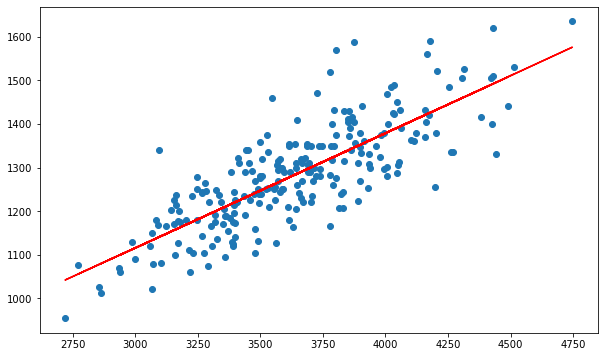

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.plot(X,predictions,'r')
plt.show()

In [15]:
error = 0

for i in range(n):
    error += (predictions[i] - y[i]) ** 2
    
mse = error/n
print("MSE",mse)

MSE 5202.9029535864975


In [16]:
rmse = np.sqrt(mse)
print("RMSE",rmse)

RMSE 72.13115106239812


In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
st = StandardScaler()

In [19]:
X = X.reshape((-1,1))
scaled_x = st.fit_transform(X)

In [20]:
y = y.reshape((-1,1))
scaled_y = st.fit_transform(y)

In [27]:
scaled_x.shape, scaled_y.shape

((237, 1), (237, 1))

In [28]:
scaled_x[:5]

array([[2.40886829],
       [0.28535333],
       [1.72023489],
       [0.39235214],
       [1.4897759 ]])

In [29]:
scaled_y[:5]

array([[ 2.0579083 ],
       [ 0.11763692],
       [ 0.43407603],
       [-0.00727325],
       [ 2.557549  ]])

In [30]:
def gradient(x,y,epochs,alpha):
    slope = 0
    inter = 0
    for i in range(epochs):
        # batch gradient descent
        y_pred = slope * x + inter
        loss = y_pred - y
        grad_slope = (2/n) * np.dot(loss.T, x)
        grad_inter = (2/n) * np.sum(loss)
        slope = slope - alpha * grad_slope
        inter = inter - alpha * grad_inter
        #print(slope, inter)
    return slope, inter

In [31]:
epochs = 10000
alpha = 0.003

slope, inter = gradient(scaled_x,scaled_y,epochs, alpha)

In [32]:
slope, inter

(array([[0.79956971]]), -3.3314560674118543e-16)

In [33]:
predictions = []

for i in range(n):
    pred = slope[0] * scaled_x[i] + inter
    predictions.append(pred)

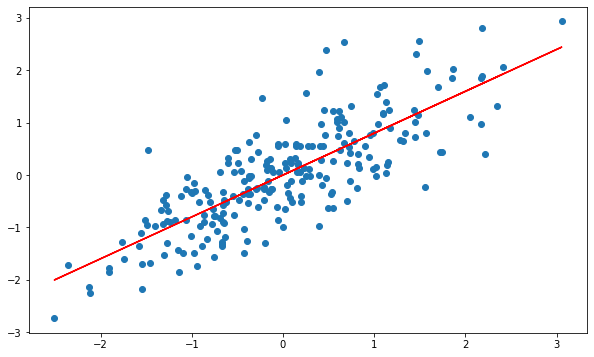

In [34]:
plt.figure(figsize=(10,6))
plt.scatter(scaled_x, scaled_y)
plt.plot(scaled_x,predictions,'r')
plt.show()

In [35]:
error = 0

for i in range(n):
    error += (predictions[i] - scaled_y[i]) ** 2
    
mse = error/n
print("MSE",mse)

MSE [0.36068828]
